In [1]:
%pip install topas2numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
import os
from topas2numpy import read_ntuple  
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
#directory
basedirectory = os.getcwd()
phspdirectory = os.path.join(basedirectory, "..","data","input")
outputdirectory = os.path.join(basedirectory, "..","data","output")

#dictionary
phsp_category = {}
phsp_dataframe = {}
phsp_label = {}
categorized_phsp_data = {}

#looping the file inside the directory, 
for item in os.listdir(phspdirectory): 
#Returns a list of the names of the entries in a directory
    if item.endswith(".phsp"):
        files = os.path.join (phspdirectory, item)
        data = read_ntuple(files)

        nomen = item.split('_')
        beamtype = nomen [0]          
        beam_energy = nomen[1]       
        material = nomen[2]          
        position = nomen[3]     
        beforeafter = nomen [4]     
        component = nomen[5]         
        size = nomen[6]              
        key = f"{beamtype}_{beam_energy}_{material}_{position}_{beforeafter}_{component}_{size}"

        # Ensure the key exists in the dictionary
        if key not in categorized_phsp_data:
            categorized_phsp_data[key] = {}

        # Add the data to the nested dictionary
        categorized_phsp_data[key][item] = data
     
        df = pd.DataFrame (data) 
        phsp_dataframe [item] = df

        print(f"File: {item}")
        print("Field Names (dtype):", data.dtype.names)
        print("-" * 40)  # Just to separate the output for each file

File: Proton_140MeV_Udara_(-08-5688CM)_Before_WaterPhantom_60x60.phsp
Field Names (dtype): ('Position X [cm]', 'Position Y [cm]', 'Position Z [cm]', 'Direction Cosine X', 'Direction Cosine Y', 'Energy [MeV]', 'Weight', 'Particle Type (in PDG Format)', 'Flag to tell if Third Direction Cosine is Negative (1 means true)', 'Flag to tell if this is the First Scored Particle from this History (1 means true)')
----------------------------------------
File: Proton_138-0MeV_Udara_(-08-5688CM)_Before_WaterPhantom_60x60.phsp
Field Names (dtype): ('Position X [cm]', 'Position Y [cm]', 'Position Z [cm]', 'Direction Cosine X', 'Direction Cosine Y', 'Energy [MeV]', 'Weight', 'Particle Type (in PDG Format)', 'Flag to tell if Third Direction Cosine is Negative (1 means true)', 'Flag to tell if this is the First Scored Particle from this History (1 means true)')
----------------------------------------


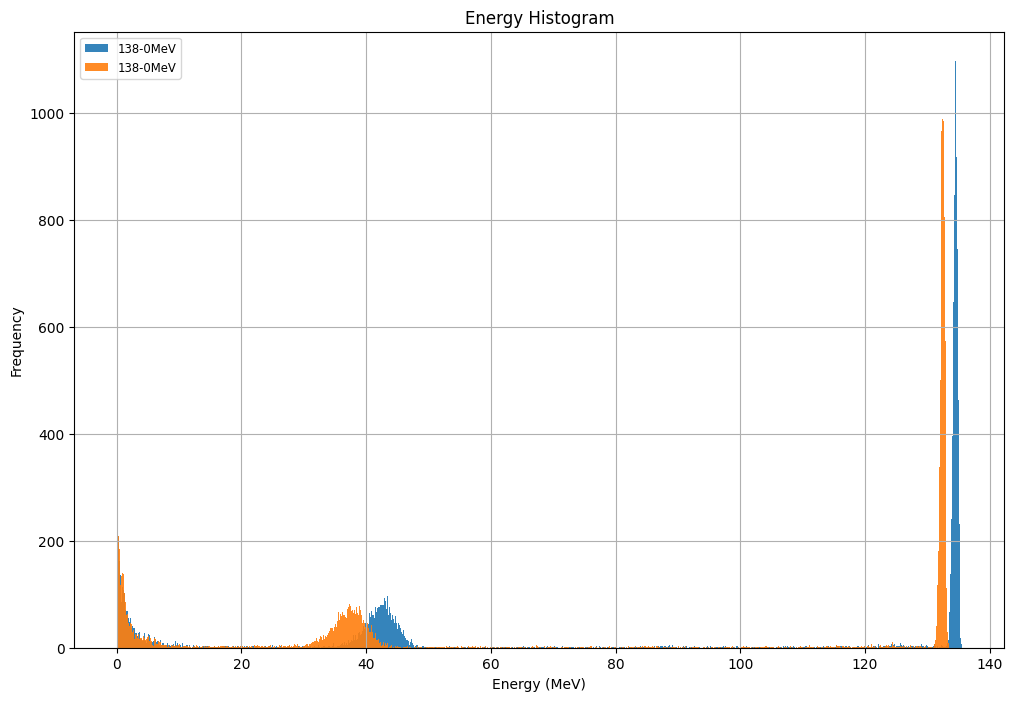

In [14]:
# Plot energy distributions for each file
plt.figure(figsize=(12, 8))

for item, df in phsp_dataframe.items():
    if 'Energy [MeV]' in df.columns:
        plt.hist(df['Energy [MeV]'], bins=1000, alpha=0.9, label=beam_energy)

# Customize the plot
plt.title("Energy Histogram")
plt.xlabel("Energy (MeV)")
plt.ylabel("Frequency")
plt.legend(loc='upper left', fontsize='small')
plt.grid(True)

# Save the combined graph
output_path = os.path.join(outputdirectory, "energy histogram.png")
plt.savefig(output_path, dpi=600)
plt.show()